<a href="https://colab.research.google.com/github/nikhil1234108/data-science/blob/main/transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing necessary librarys

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization, Activation, Flatten, Input



importing target dataset

In [70]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

preproccssing

In [71]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [72]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [81]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train.shape

(60000, 28, 28)

In [74]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

importing and bulding pre-trained dataset

In [75]:
base_model=tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')

building conv layers

In [83]:
model = models.Sequential()

model.add(layers.Reshape((28, 28, 1), input_shape=(28*28,)))

model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', padding='same'))
model.add(BatchNormalization())

model.add(layers.MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))

In [ ]:
constructing dense layer

In [84]:
model.add(Dense(1024,activation='relu'))
x=Dropout(0.2)
model.add(Dense(512,activation='relu'))
x=Dropout(0.2)
model.add(Dense(256,activation='relu'))
x=Dropout(0.2)
model.add(Dense(10,activation='softmax'))

it dont disturb the values of pre trained layers and not update

In [85]:
for layer in base_model.layers:
  layer.trainable=False

In [86]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy','precision'])

In [87]:
epochs=10
batch_size=128
train_dataset=tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(60000).batch(batch_size)
val_dataset=tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(batch_size)


making compilation in a proper way

Epoch 1/10
Training Accuracy: 0.11236666887998581
Validation Accuracy: 0.11349999904632568
Epoch 2/10
Training Accuracy: 0.11236666887998581
Validation Accuracy: 0.11349999904632568
Epoch 3/10
Training Accuracy: 0.11236666887998581
Validation Accuracy: 0.11349999904632568
Epoch 4/10
Training Accuracy: 0.11236666887998581
Validation Accuracy: 0.11349999904632568
Epoch 5/10
Training Accuracy: 0.11236666887998581
Validation Accuracy: 0.11349999904632568
Epoch 6/10
Training Accuracy: 0.11236666887998581
Validation Accuracy: 0.11349999904632568
Epoch 7/10
Training Accuracy: 0.11236666887998581
Validation Accuracy: 0.11349999904632568
Epoch 8/10
Training Accuracy: 0.11236666887998581
Validation Accuracy: 0.11349999904632568
Epoch 9/10
Training Accuracy: 0.11236666887998581
Validation Accuracy: 0.11349999904632568
Epoch 10/10
Training Accuracy: 0.11236666887998581
Validation Accuracy: 0.11349999904632568


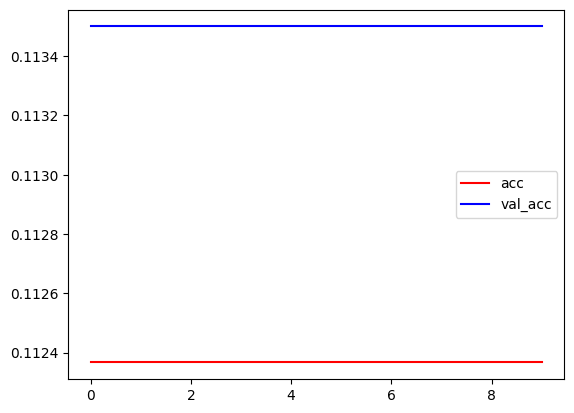

In [104]:
!pip install matplotlib

import matplotlib.pyplot as plt
import tensorflow as tf

epochs = 10
batch_size = 128
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(60000).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

accuracy_history = []
val_accuracy_history = []

for epoch in range(epochs):
  print(f"Epoch {epoch + 1}/{epochs}")
  for images, labels in train_dataset:
    with tf.GradientTape() as tape:
      images = tf.reshape(images, [-1, 784])
      predictions = model(images)
      loss = tf.keras.losses.categorical_crossentropy(labels, predictions)
      gradients = tape.gradient(loss, model.trainable_variables)
      optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
      optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Calculate and store training accuracy for this epoch
  accuracy = tf.metrics.CategoricalAccuracy()
  for images, labels in train_dataset:
    images = tf.reshape(images, [-1, 784])
    predictions = model(images)
    accuracy.update_state(labels, predictions)
  train_acc = accuracy.result().numpy()
  accuracy_history.append(train_acc)

  # Calculate and store validation accuracy for this epoch
  accuracy = tf.metrics.CategoricalAccuracy()
  for images, labels in val_dataset:
    images = tf.reshape(images, [-1, 784])
    predictions = model(images)
    accuracy.update_state(labels, predictions)
  val_acc = accuracy.result().numpy()
  val_accuracy_history.append(val_acc)

  print(f"Training Accuracy: {train_acc}")
  print(f"Validation Accuracy: {val_acc}")

# Plot the accuracy and validation accuracy
plt.plot(accuracy_history, label='acc', color='red')
plt.plot(val_accuracy_history, label='val_acc', color='blue')
plt.legend()
plt.show()

In [95]:
epochs=5
batch_size=256
train_dataset=tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(60000).batch(batch_size)
test_datset=tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(batch_size)
for epoch in range(epochs):
  print(f"{epoch+1}/{epochs}")
  for images, label in train_dataset:
    with tf.GradientTape() as tape:
      images=tf.reshape(images,[-1,28*28])
      predictions=model(images)
      loss=tf.keras.losses.categorical_crossentropy(labels,pridiction)
      gradients=tape.gradient(loss,model.trainable_variables)
      optimizer=tf.keras.optimizers,Adam(learning_rate=0.002)
      optimizer.apply_gradients(zip(gradient,model.trainable_variables))

      accuracy = tf.metrics.CategoricalAccuracy()
      for images, labels in val_dataset:
        images = tf.reshape(images,[-1,28*28])
        predictions = model(images)
        accuracy.update_state(labels,prediction)
        val_acc=accuracy.result().numpy()
        print(f"Validation Accuracy: {val_acc}")

